In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
from sympy import solve, symbols
%matplotlib inline

# Quantitative measures

## Numpy Calculations - array.method()

In [ ]:
array=np.array([1,2,3])

array.max() # max
array.argmax() # indices of max
array.min() # min
array.argmin() # indices of min
array.ptp() # peak to peak = range = max - min
array.clip(2,3) # items in [min, max]

array.mean()
array.var(ddof=1)
array.std(ddof=0)
array.sum() # sum
array.cumsum() # a_n = sum(a_1 + a_2 +...+ a_n)
array.prod() # a*b*c*...*z

## Pandas Calculations - Series.method()

In [ ]:
Series=pd.Series([1,2,3])

Series.mean() # Mean of values
Series.std() # Bessel-corrected sample standard deviation
Series.var() # Unbiased variance
Series.median() # Arithmetic median of values
Series.mode() # Mode
Series.min() # Minimum
Series.max() # Maximum

Series.sum() # Sum of values
Series.count() # Number of non-null observations

Series.sem() # Standard error of the mean
Series.quantile(q=percentage) # Sample quantile at percentage (float or array)
Series.abs() # Absolute Value #Series

Series.value_counts()
Series.value_counts().values
Series.value_counts().index

In [ ]:
# value_counts
Series_C=pd.Series(['a','a','b','c','c','c','c'])
print Series_C.value_counts()['c'] #     = 4
print Series_C.value_counts() # Series of the values-counted(descending)
print Series_C.value_counts().values  # array of the values-counted series (descending)
print Series_C.value_counts().index # indices of the values-counted series (descending)
print Series_C.value_counts().index[0] # first item of the values-counted series, i.e. the mode   (return a string here)
print Series_C.mode() # (return a Series)

In [ ]:
# Summary of data
data_=[1,2,3,4,54,212,12,45,10,30,20,35,20,50,20]
data_series=pd.Series(data_)
print data_series.describe()

# Plotting
hist bar pie polygon scatter box

## matplotlib.pyplot as plt

### Line

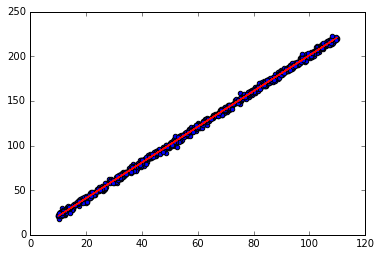

In [2]:
x=np.random.ranf(1000)*100+10
y=2*x+1
plt.scatter(x, y+2*np.random.randn(1000))
plt.plot(x, y, color="r", linewidth=1, label=r'$y=2x+1$')

### Histogram

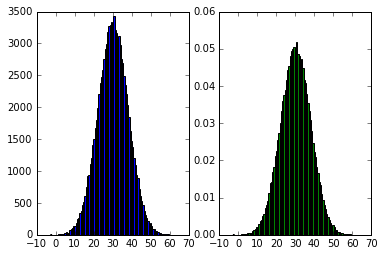

In [3]:
# plt.hist(x, bins=10, range=None, color=None, normed=False)
dis1=np.random.normal(30,8,100000)
plt.subplot(1,2,1)
dis1_hist=plt.hist(dis1, bins=100, color=None, normed=False)
plt.subplot(1,2,2)
dis1_hist_normed=plt.hist(dis1, bins=100, color='g', normed=True)

### Scatter

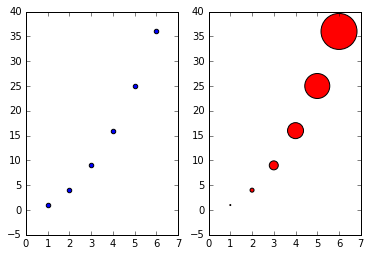

In [4]:
# plt.scatter(x, y, s=20, c=None)  S: size     c: color
x=np.array([1,2,3,4,5,6])
y=x**2
size=x**4
plt.subplot(1,2,1)
dis1_hist_normed=plt.scatter(x, y)
plt.subplot(1,2,2)
dis1_hist_normed=plt.scatter(x, y, s=size, c='r')

### Bar

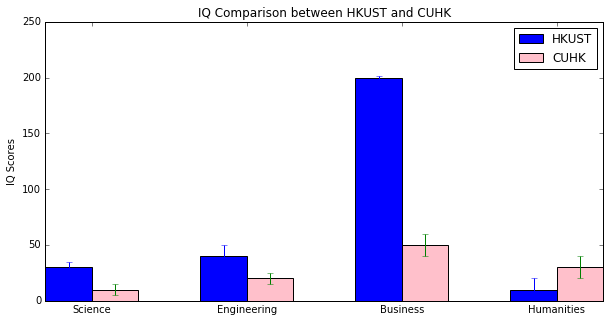

In [5]:
# plt.bar(left, height, width=0.8, bottom=None, color=blue, yerr= , label= )
# Make a bar plot with rectangles bounded by: left, left + width, bottom, bottom + height
HKUSTiq=[30,40,200,10]
HKUSTerr=[5,10,1,10]
CUHKiq=[10,20,50,30]
CUHKerr=[5,5,10,10]
width=3 
left=np.array([0,10,20,30])
plt.figure(figsize=(10,5))
plt.bar(left, HKUSTiq, yerr=HKUSTerr, width=width, label="HKUST")
plt.xticks(left+width, ["Science","Engineering","Business","Humanities"])
plt.bar(left+width, CUHKiq, yerr=CUHKerr,width=width, color='pink',label="CUHK")
plt.ylabel("IQ Scores")
plt.title("IQ Comparison between HKUST and CUHK")
plt.legend()

### Pie

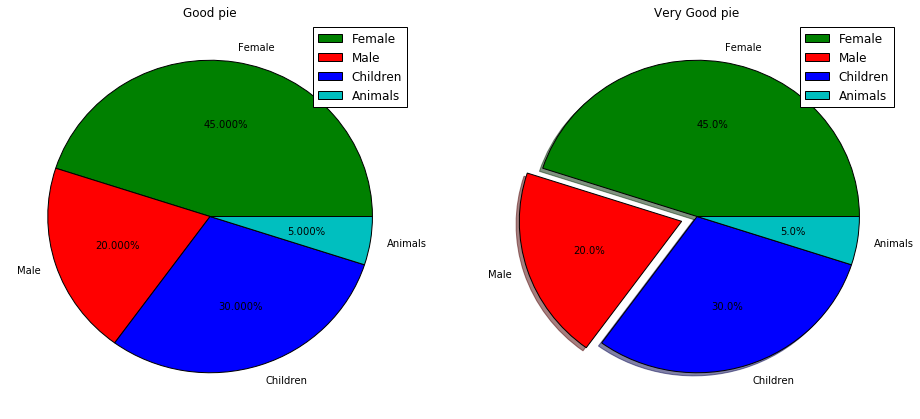

In [6]:
percentage=[45,20,30, 5]
colors=['g','r','b','c']
labels=['Female','Male','Children','Animals']
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.pie(percentage, labels=labels, colors=colors, explode=[0,0,0,0], autopct="%.3f%%")
# autopct="%.nf%%" <=> number displayed as percentage, rounded to n decimals
plt.title("Good pie")
plt.legend()
plt.subplot(1,2,2)
plt.pie(percentage, labels=labels,colors=colors, autopct="%.1f%%", explode=(0,0.1,0,0), shadow=True)
plt.title("Very Good pie")
plt.legend()

### Polygon

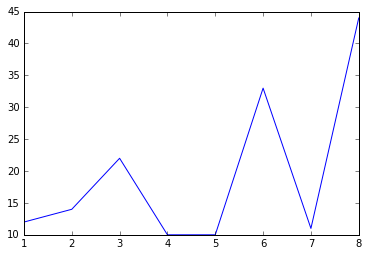

In [7]:
# plt.(x, y)  # this is actually plotting connected lines
x=[1,2,3,4,5,6,7,8]
y=[12,14,22,10,10,33,11,44]
plt.plot(x,y)

### Boxplot
- A descriptive statistics, a **box plot** or **boxplot** is a convenient way of graphically depicting groups of numerical data through their quartiles. 
- Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence also called **box-and-whisker plot** and **box-and-whisker diagram**. 
- **Outliers** may be plotted as individual points.

In [8]:
df_futures=pd.DataFrame.from_csv("http://pythontrade.com/public/Data/20150504.csv")
future_r=df_futures["Price"].pct_change()
print future_r[0] # !!! The first item of pct_change is NaN!

nan


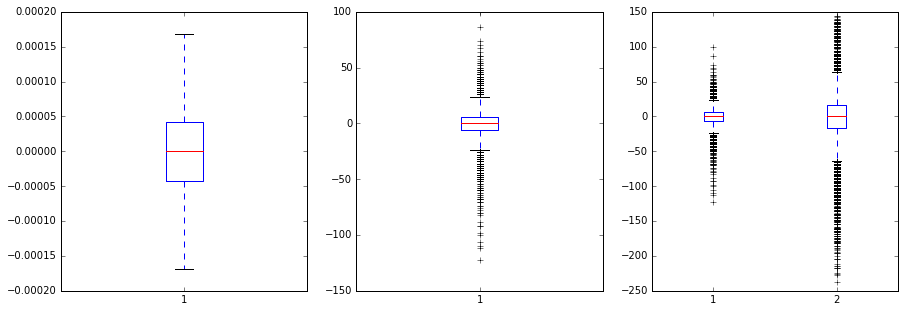

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
boxplot1=plt.boxplot(future_r.dropna(),showfliers=False,vert=True)

money_change1=df_futures["Price"]/1000-df_futures["Price"].shift(10)/1000
plt.subplot(1,3,2)
boxplot2=plt.boxplot(money_change1.dropna())

money_change2=df_futures["Price"]/1000-df_futures["Price"].shift(100)/1000
plt.subplot(1,3,3)
boxplot3=plt.boxplot((money_change1.dropna(), money_change2.dropna())) # side-by-side boxplot

#### Outliers
- An outlier is an observation that lies an abnormal distance from other values in a sample.
- This definition does not help to decide what will be considered abnormal. Hence, it's necessary to characterize normal observations before we can pick abnormal observation.
- In most cases, outliers are **Good**
#### z-score and detecting ourliers <p>
- z-score is used to justtify an observation to be outlier if the population distribution is (almost) symmetric.
- z-score is define by $$z\space score=\frac{x_o-\bar{x}}{s}$$
- If the distribution is not symmetric, z-score is not a good criterion.
- If the distribution is roughly symmetric, and **|z-score|>2.5**, then the observation is an outlier

In [10]:
x0=50
z0=(x0-money_change2.mean())/money_change2.std()
if abs(z0)>2.5: print "z0 is an outlier"
if abs(z0)<=2.5: print "z0 is not an outlier"

z0 is not an outlier


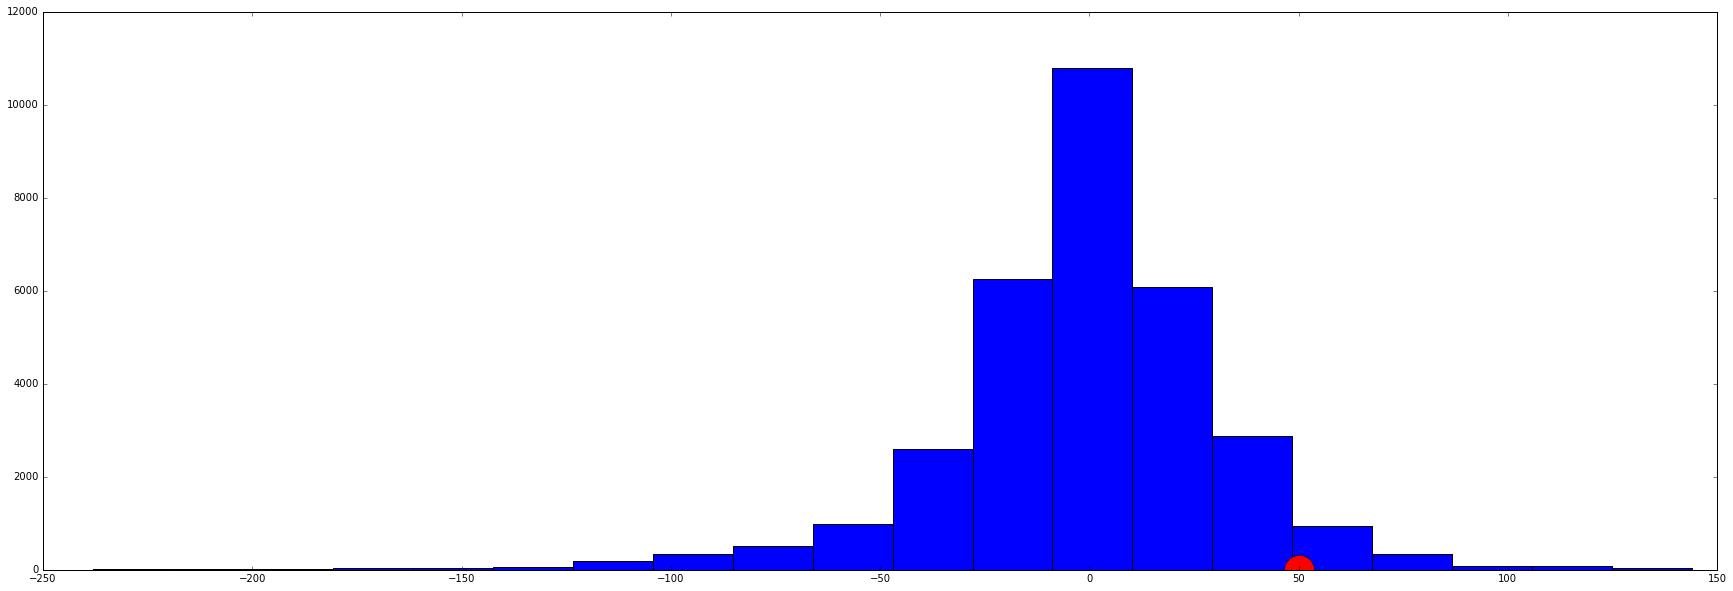

In [11]:
plt.figure(figsize=(30,10))
plt.hist(money_change2.dropna(),bins=20)
plt.plot(50,0,'or',markersize=30) # plot a POINT(50,0)

### Plot colors